# First Autoencoder  

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Data 생성

In [2]:
m = 100
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
data.shape

(100, 3)

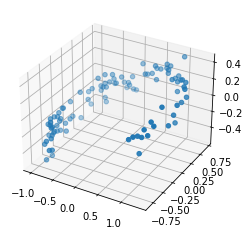

In [3]:
X_train = data - data.mean(axis=0, keepdims=0)

# preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');

## Build the model

In [4]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=(3,))])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=(2,))])

autoencoder = keras.models.Sequential([encoder, decoder])

In [5]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 1ms/step - loss: 0.6528
Epoch 2/200
4/4 [==============================] - 0s 926us/step - loss: 0.3305
Epoch 3/200
4/4 [==============================] - 0s 693us/step - loss: 0.1910
Epoch 4/200
4/4 [==============================] - 0s 682us/step - loss: 0.1381
Epoch 5/200
4/4 [==============================] - 0s 989us/step - loss: 0.0976
Epoch 6/200
4/4 [==============================] - 0s 857us/step - loss: 0.0747
Epoch 7/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0663
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 9/200
4/4 [==============================] - 0s 897us/step - loss: 0.0587
Epoch 10/200
4/4 [==============================] - 0s 846us/step - loss: 0.0602
Epoch 11/200
4/4 [==============================] - 0s 966us/step - loss: 0.0565
Epoch 12/200
4/4 [==============================] - 0s 932us/step - loss: 0.0593
Epoch 13/200
4/4 [=========================

## Plot the encoder output

In [7]:
# encode the data
codings = encoder.predict(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [-0.24471297  0.30393857  0.08037712]
encoded point: [ 0.30715293 -0.25967357]


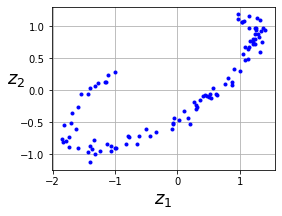

In [8]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot the Decoder output

In [9]:
# decode the encoder output
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [-0.24471297  0.30393857  0.08037712]
encoded point: [ 0.30715293 -0.25967357]
decoded point: [-0.24655296  0.3100537   0.07350338]


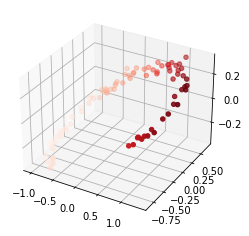

In [10]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');